<a href="https://colab.research.google.com/github/Rudrajit12/ML_Projects/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
location = '/content/drive/MyDrive/AlmaBetter Data Science/Module 4/'
car_dekho_df = pd.read_csv(location + 'CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
cardetails_df = pd.read_csv(location + 'Car details v3.csv')
cardata_df = pd.read_csv(location + 'car data.csv')

## **Data Inspection**

In [ ]:
# look at the top rows
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
cardetails_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
cardata_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# number of records
car_dekho_df.shape

(4340, 8)

In [ ]:
cardetails_df.shape

(8128, 13)

In [ ]:
cardata_df.shape

(301, 9)

In [ ]:
# check info
car_dekho_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


There are 4340 records present and 8 features available to us. We have no missing values present in the dataset and ready to look at the distributions of the variables.

In [ ]:
cardetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


There are 8128 records present and some missing values or null values in few columns.

In [ ]:
cardata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


There are only 301 records present in this dataset and no missing value present.

## **Let's check the description of each dataset**

In [ ]:
# check statistic
car_dekho_df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
cardetails_df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
cardata_df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


**Our main motive is to find the selling price of the cars on the website of CarDekho, so we will focus on the car_dekho_df to visualize it more.**

In [ ]:
# check for duplicate values
len(car_dekho_df[car_dekho_df.duplicated()])

763

We can see that we have a good amount of duplicate records in our cardekho dataset which needs to be dropped. Duplicate records won't give any useful insights and will make our model less accurate.

In [ ]:
car_dekho_df.drop_duplicates(keep='first', inplace=True)

In [ ]:
car_dekho_df.reset_index(inplace=True)

In [ ]:
del car_dekho_df['index']

In [ ]:
car_dekho_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 223.7+ KB


In [ ]:
car_dekho_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## **Let's move to EDA**

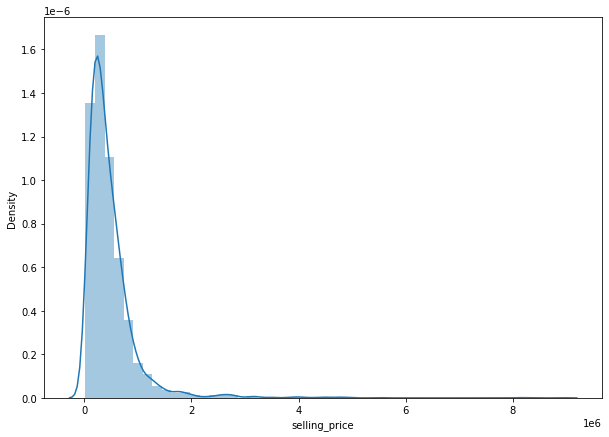

In [ ]:
# distribution of dependent variable
plt.figure(figsize=(10,7))
sns.distplot(car_dekho_df['selling_price'])

The distribution of selling price is positively skewed and thus we need to apply log transformation to make it more Gaussian.

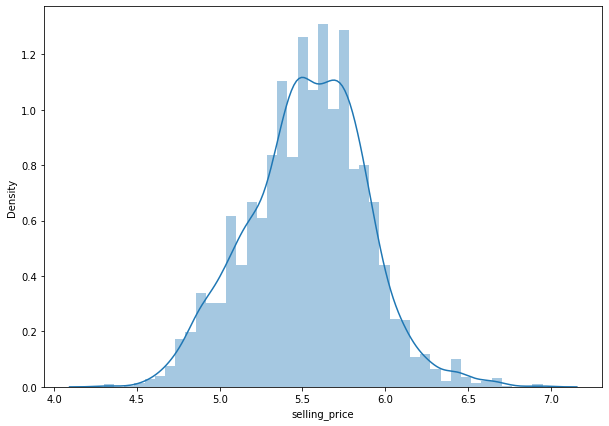

In [ ]:
# applying log transformation
plt.figure(figsize=(10,7))
sns.distplot(np.log10(car_dekho_df['selling_price']))

This looks more like a Normal Distribution!!

In [ ]:
numeric_features = car_dekho_df.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

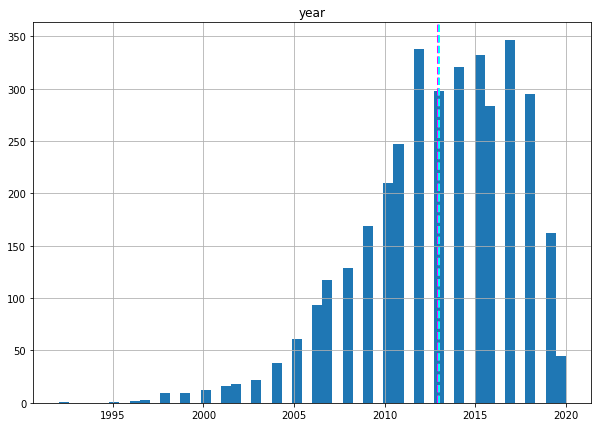

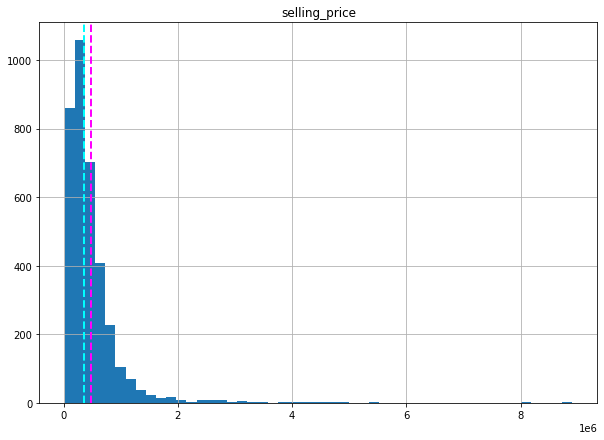

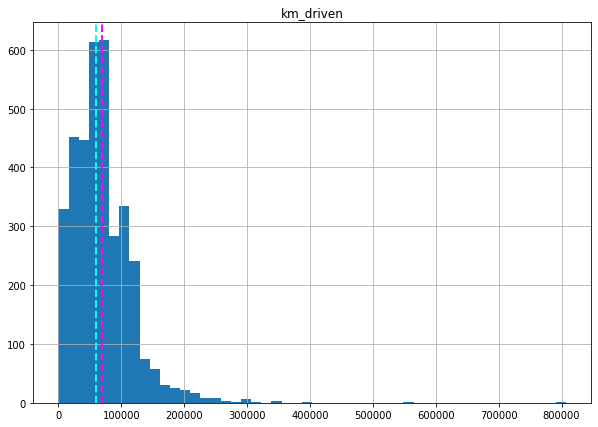

In [ ]:
# plot a bar plot for each numerical feature count

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = car_dekho_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

The distributions are more or less skewed in either positive or negative direction and hence we need to apply log transformation here also.

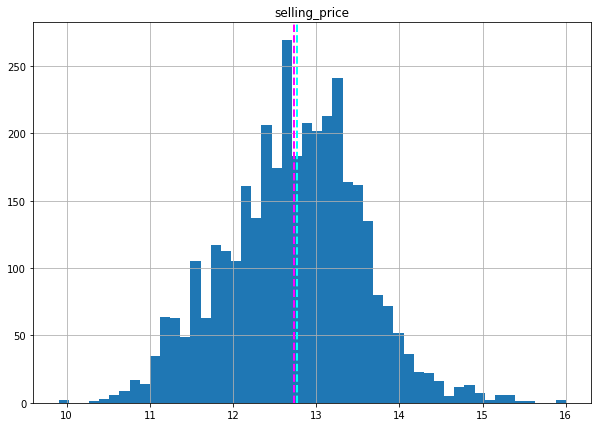

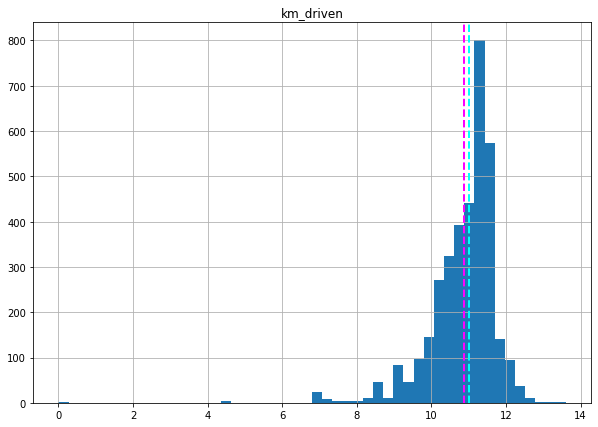

In [ ]:
# applying log transformation
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = np.log(car_dekho_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

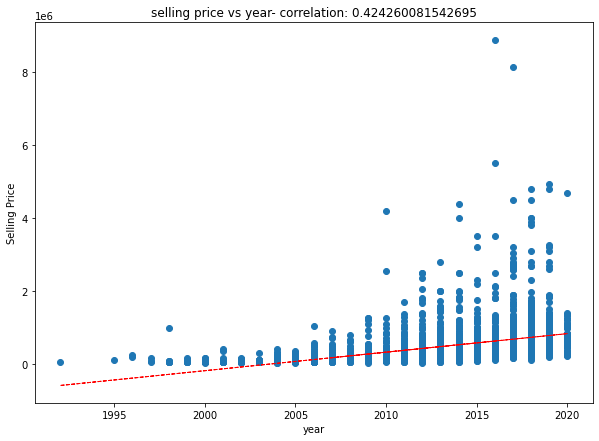

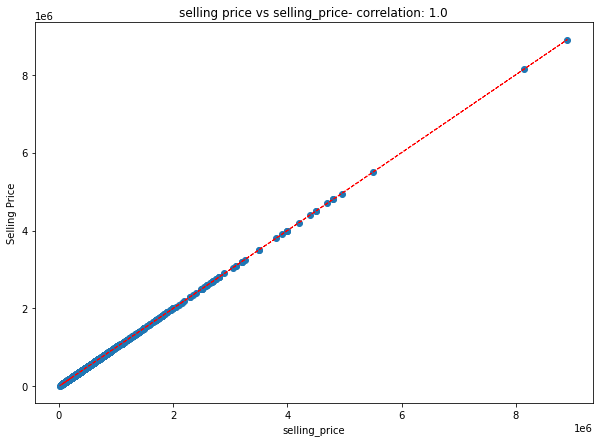

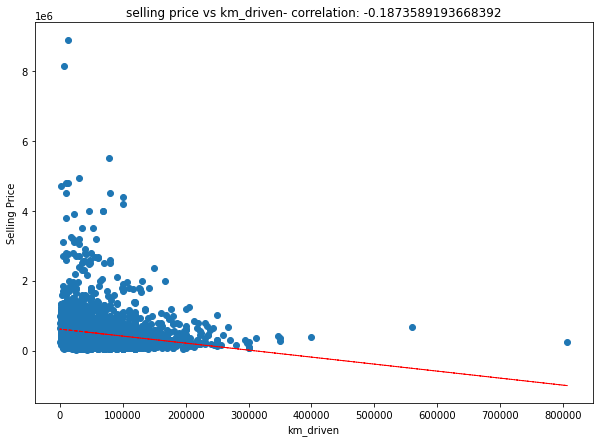

In [ ]:
# relationship with dependent variable
for col in numeric_features[0:]:
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    feature = car_dekho_df[col]
    label = car_dekho_df['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    ax.set_title('selling price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(car_dekho_df[col], car_dekho_df['selling_price'], 1)
    y_hat = np.poly1d(z)(car_dekho_df[col])

    plt.plot(car_dekho_df[col], y_hat, "r--", lw=1)

plt.show()

There are slight correlations present between Year and Selling Price, and Km_driven and Selling Price.

From above we can see that most cars have been driven 200000 kms and we can keep year data for past 15 years as per govt rules, a car model can stay in road for 15 years only.

## **Let's remove few outliers:**

In [ ]:
# removing the years and kms outliers
car_dekho_df = car_dekho_df[car_dekho_df['year'] >= 2005]
car_dekho_df = car_dekho_df[car_dekho_df['km_driven'] <= 200000]

In [ ]:
car_dekho_df.reset_index(inplace=True)

In [ ]:
del car_dekho_df['index']

In [ ]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


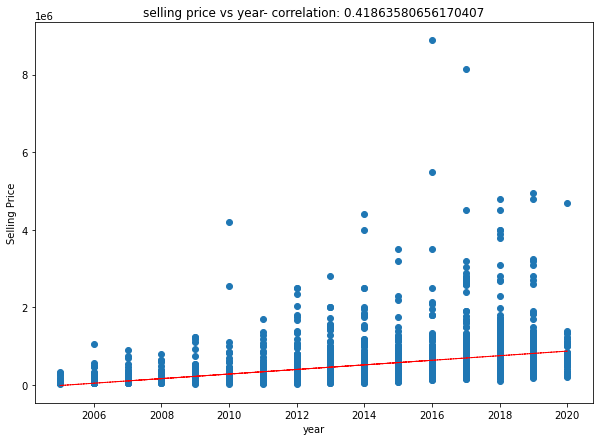

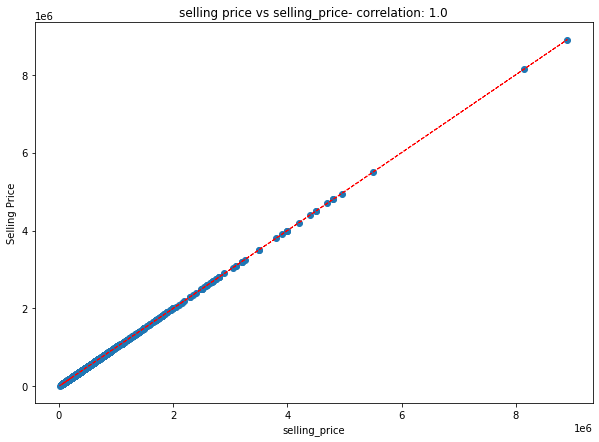

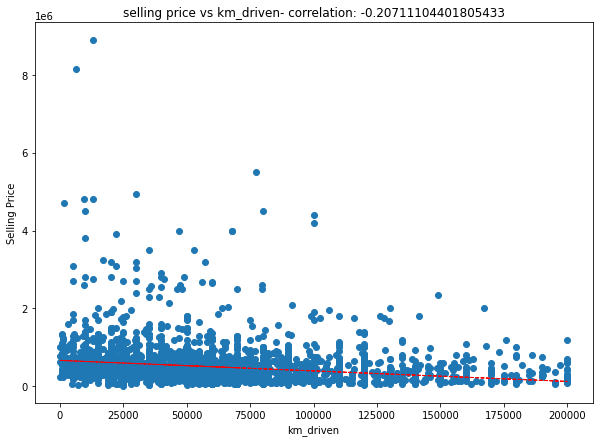

In [ ]:
# relationship with dependent variable
for col in numeric_features[0:]:
    fig = plt.figure(figsize=(10,7))
    ax = fig.gca()
    feature = car_dekho_df[col]
    label = car_dekho_df['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    ax.set_title('selling price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(car_dekho_df[col], car_dekho_df['selling_price'], 1)
    y_hat = np.poly1d(z)(car_dekho_df[col])

    plt.plot(car_dekho_df[col], y_hat, "r--", lw=1)

plt.show()

After removing the outliers we can depict the relation between the variables as:

* If km_driven is less then the price will be higher
* If the car is more years old then the price will be cheaper


Now, let us try to find and remove the multicollinearity from the dataset.

In [ ]:
# removing multicollinearity
car_dekho_df['age'] = 2020 - car_dekho_df['year']

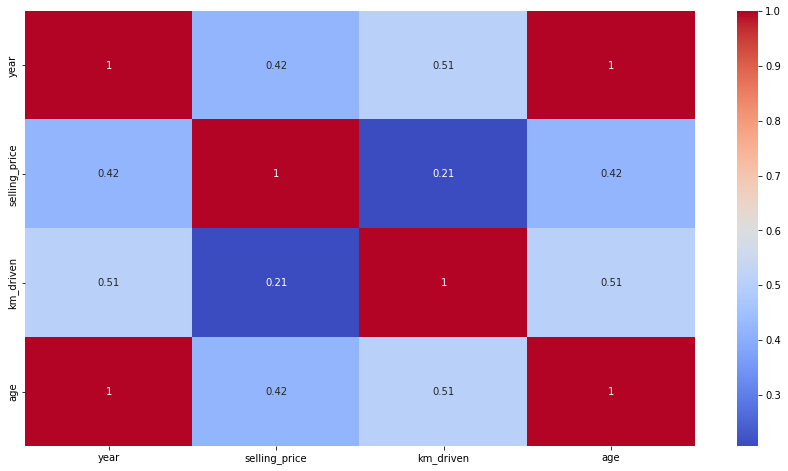

In [ ]:
# Correlation
plt.figure(figsize=(15,8))
correlation = car_dekho_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can see from the heatmap above that no variables are highly correlated with each other. We need to remove year from the dataset as it is giving the same info as age.

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(car_dekho_df[[i for i in car_dekho_df.describe().columns if i not in ['year','selling_price']]])

,variables,VIF
0,km_driven,4.2816
1,age,4.2816


In [ ]:
numerical_features = ['age', 'km_driven']

In [ ]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [ ]:
car_dekho_df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
car_dekho_df['company'] = car_dekho_df['name'].str.split(" ", expand=True)[0]
car_dekho_df['company'] = car_dekho_df['company'].str.title()
car_dekho_df['company'].value_counts()

Maruti           993
Hyundai          614
Mahindra         300
Tata             299
Ford             215
Honda            207
Toyota           154
Chevrolet        150
Renault          110
Volkswagen        92
Nissan            52
Skoda             46
Audi              31
Fiat              30
Datsun            29
Bmw               25
Mercedes-Benz     19
Jaguar             5
Land               5
Mitsubishi         5
Volvo              4
Jeep               3
Mg                 2
Ambassador         2
Isuzu              1
Kia                1
Force              1
Name: company, dtype: int64

In [ ]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda


## **Moving to the categorical data**

---



---



In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

In [ ]:
# check out the categorical variables
categorical_features = car_dekho_df.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

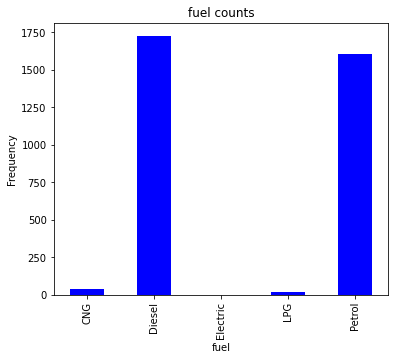

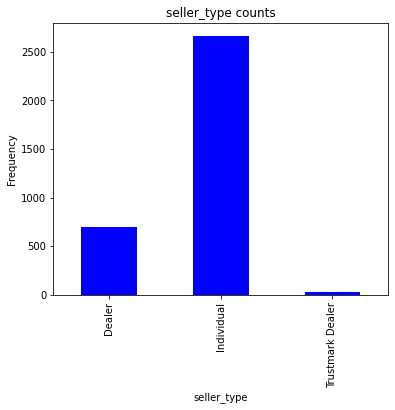

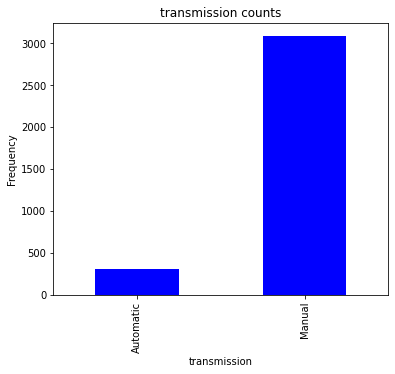

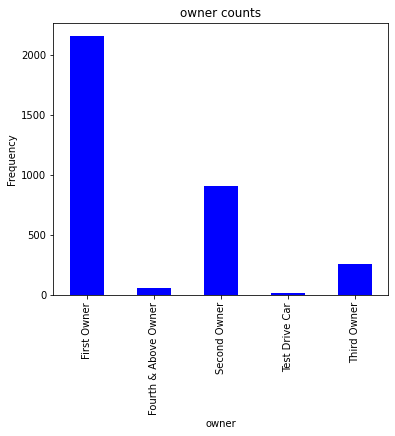

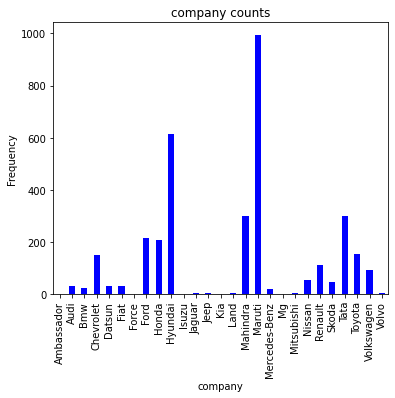

In [ ]:
# distribution of categorical features
for col in categorical_features[1:]:
    counts = car_dekho_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='blue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

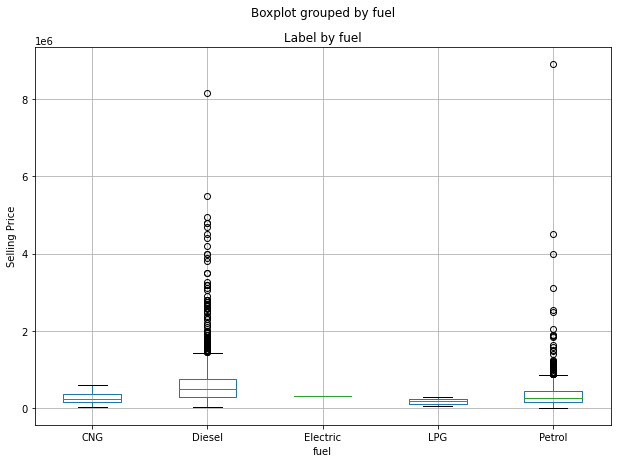

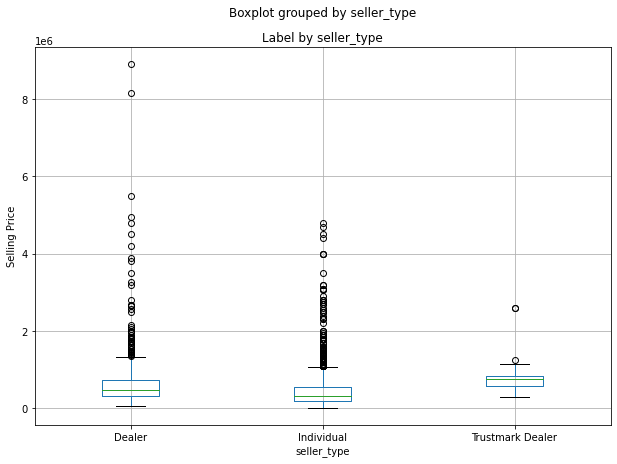

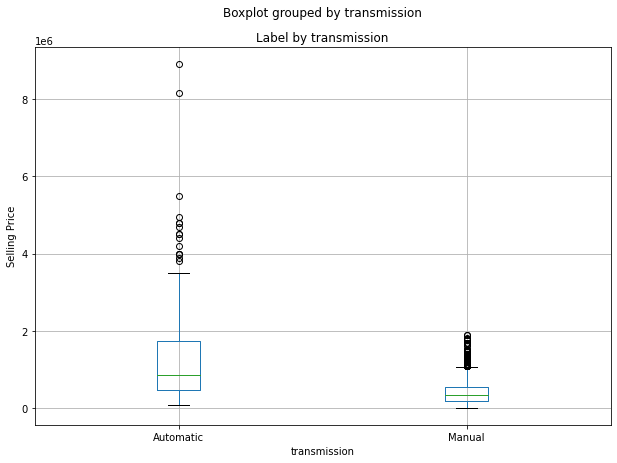

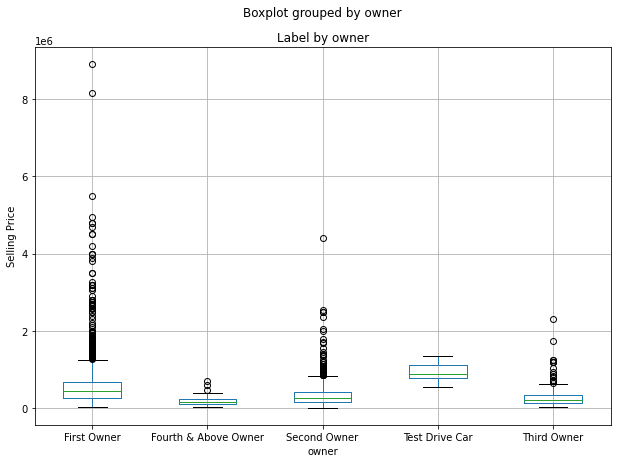

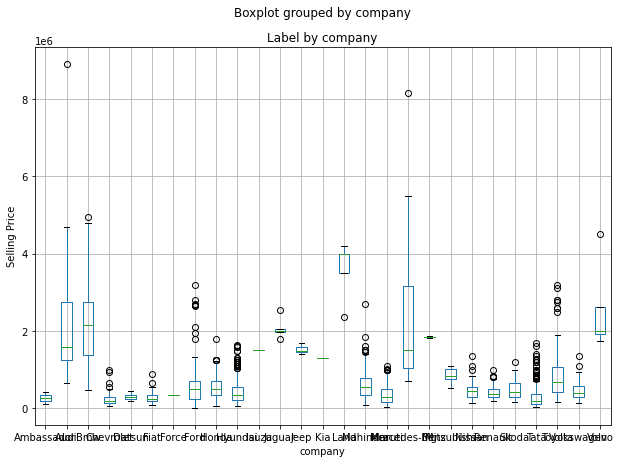

In [ ]:
# check relationship with dependent variable
for col in categorical_features[1:]:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    car_dekho_df.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Selling Price")
plt.show()

<Figure size 1440x864 with 0 Axes>

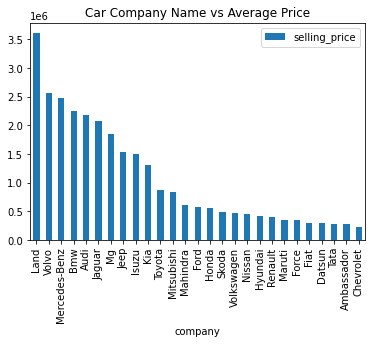

In [ ]:
# check the average price vs car make
plt.figure(figsize=(20, 12))

df_auto = pd.DataFrame(car_dekho_df.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_auto.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
df_auto.rename(columns={'selling_price':'avg_selling_price'},inplace=True)

In [ ]:
car_dekho_df = car_dekho_df.merge(df_auto,on = 'company',how = 'left')
car_dekho_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,company,avg_selling_price
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai,423908.747557
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun,296551.655172
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda,557067.584541
...,...,...,...,...,...,...,...,...,...,...,...
3390,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,6,Hyundai,423908.747557
3391,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,6,Hyundai,423908.747557
3392,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,11,Maruti,350566.930514
3393,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,4,Hyundai,423908.747557


In [ ]:
# divide the cars into categories w.r.t price
car_dekho_df['company_category'] = car_dekho_df['avg_selling_price'].apply(lambda x : 0 if x < 400000 else (1 if 400000 <= x < 700000 else 2))

In [ ]:
car_dekho_df["company_category"].value_counts()

1    1636
0    1504
2     255
Name: company_category, dtype: int64

In [ ]:
car_dekho_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,company,avg_selling_price,company_category
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti,350566.930514,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai,423908.747557,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun,296551.655172,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda,557067.584541,1


## **Data Preparation**

In [ ]:
car_dekho_df.shape

(3395, 12)

In [ ]:
cardekho_cpy = car_dekho_df.copy()

In [ ]:
cardekho_cpy.shape

(3395, 12)

## **Let us select the features and encode the categorical variables**

In [ ]:
car_dekho_df['fuel'].value_counts()

Diesel      1727
Petrol      1609
CNG           37
LPG           21
Electric       1
Name: fuel, dtype: int64

In [ ]:
car_dekho_df['seller_type'].value_counts()

Individual          2662
Dealer               700
Trustmark Dealer      33
Name: seller_type, dtype: int64

In [ ]:
car_dekho_df['transmission'].value_counts()

Manual       3089
Automatic     306
Name: transmission, dtype: int64

In [ ]:
car_dekho_df['owner'].value_counts()

First Owner             2160
Second Owner             909
Third Owner              254
Fourth & Above Owner      55
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
# Data encoding
encoders_nums = {'owner': {'Test Drive Car':4, 'Fourth & Above Owner':3, 'Third Owner':2, 'Second Owner':1, 'First Owner':0}}

cardekho_cpy = cardekho_cpy.replace(encoders_nums)

In [ ]:
# One hot encoding
cardekho_cpy = pd.get_dummies(cardekho_cpy, columns=["fuel","seller_type","transmission"])

In [ ]:
cardekho_cpy.head()

,name,year,selling_price,km_driven,owner,age,company,avg_selling_price,company_category,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,0,13,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,13,Maruti,350566.930514,0,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,8,Hyundai,423908.747557,1,0,1,0,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,0,3,Datsun,296551.655172,0,0,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,6,Honda,557067.584541,1,0,1,0,0,0,0,1,0,0,1


With the help of one hot encoding

* Fuel type attribute is divided into 5 new attributes.
* Transmission attribute is divided into 2 new attributes.
* Seller_Type attribute is is divided into 2 new attributes.

In [ ]:
cardekho_cpy.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'age', 'company',
       'avg_selling_price', 'company_category', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual'],
      dtype='object')

In [ ]:
numerical_features

['age', 'km_driven']

In [ ]:
features = numerical_features.copy()
features.extend(['owner','avg_selling_price','company_category','fuel_CNG','fuel_LPG','fuel_Diesel','fuel_Petrol','fuel_Electric','seller_type_Dealer',
                 'seller_type_Individual','seller_type_Trustmark Dealer','transmission_Automatic','transmission_Manual'])

In [ ]:
features

['age',
 'km_driven',
 'owner',
 'avg_selling_price',
 'company_category',
 'fuel_CNG',
 'fuel_LPG',
 'fuel_Diesel',
 'fuel_Petrol',
 'fuel_Electric',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Automatic',
 'transmission_Manual']

In [ ]:
len(features)

15

In [ ]:
# apply standardization
from scipy.stats import zscore
#Train test split
X = cardekho_cpy[features].apply(zscore).values

In [ ]:
y = np.log10(cardekho_cpy['selling_price']).values

In [ ]:
y

array([4.77815125, 5.13033377, 5.77815125, ..., 5.04139269, 5.93701611,
       5.35218252])

## **Implementing Linear Regression**

---

Let's now begin to train out regression model! We will need to first split up our data into an train array that contains the part of dataset used for training data, and a test array used for test data.

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2716, 15)
(679, 15)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.7460227828352295

In [ ]:
reg.coef_

array([-1.88065611e-01, -1.86234902e-02, -1.42073152e-02,  8.12022191e-02,
        5.94547725e-02,  1.01793922e+10,  7.68710526e+09,  4.90145290e+10,
        4.89552633e+10, -1.82215015e+11, -6.31354075e+10, -6.42096933e+10,
       -1.53108890e+10, -3.18970734e+11, -3.18970734e+11])

In [ ]:
reg.intercept_

-3156601589.605773

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 5.81746435e+00,  5.81843138e+00,  5.47208548e+00,  5.40883017e+00,
        5.39405394e+00,  5.69889164e+00,  5.68505955e+00,  5.28000975e+00,
        5.93454885e+00,  5.39026976e+00,  5.39518118e+00,  5.96448851e+00,
        5.64506102e+00,  5.84061766e+00,  5.55410337e+00,  5.54184866e+00,
        5.44031858e+00,  5.75953245e+00,  5.54590940e+00,  5.08683348e+00,
        5.93830442e+00,  5.82018614e+00,  5.75126219e+00,  5.72426367e+00,
        5.38322020e+00,  4.96041441e+00,  5.02994871e+00,  5.78135252e+00,
        6.64315128e+00,  5.30950499e+00,  5.41889143e+00,  4.99994993e+00,
        5.59851217e+00,  5.12986326e+00,  5.08626890e+00,  5.11299849e+00,
        5.41822386e+00,  5.62919188e+00,  5.86433363e+00,  6.62365437e+00,
        5.76798582e+00,  5.20899534e+00,  5.47538328e+00,  5.50419188e+00,
        5.44138670e+00,  5.61490965e+00,  5.52012587e+00,  5.39799070e+00,
        6.31923771e+00,  5.32671690e+00,  5.53506041e+00,  4.95951414e+00,
        5.40226316e+00,  

## **Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

* Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−y^i|

* Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−y^i)2

* Root Mean Squared Error (RMSE) bold text is the square root of the mean of the squared errors:

1n∑i=√1n(yi−y^i)2

**Comparing these metrics:**

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 score is {}'.format(r2_score(actual, predicted)))

In [ ]:
# testing dataset metrics
print_metrics(10**y_test, 10**y_pred)

MSE is 62075096192.40774
RMSE is 249148.7431082239
R2 score is 0.7578619212441918


In [ ]:
# Adjusted R2
def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [ ]:
adjusted_r2(len(y_train), len(features), 10**y_test, 10**y_pred)

0.7565167096955485

Text(0, 0.5, 'Predicted selling price')

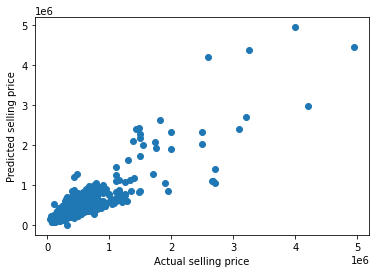

In [ ]:
# plotting actual vs predicted
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

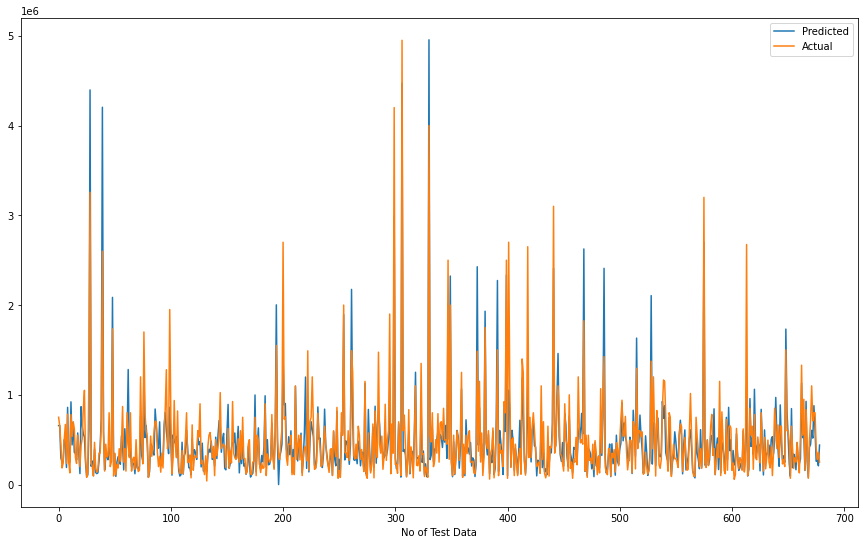

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### **Residuals**

A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

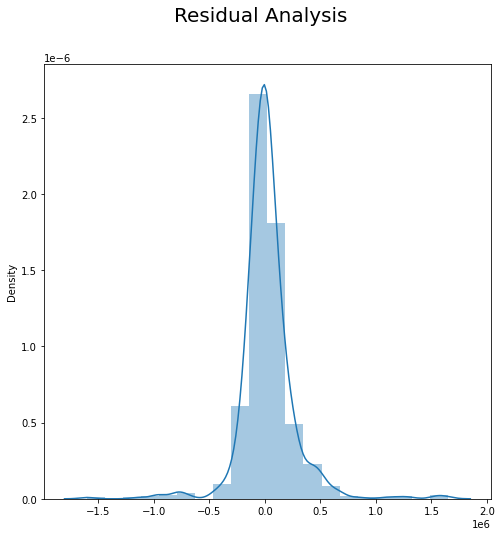

In [ ]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

Text(0, 0.5, 'residuals')

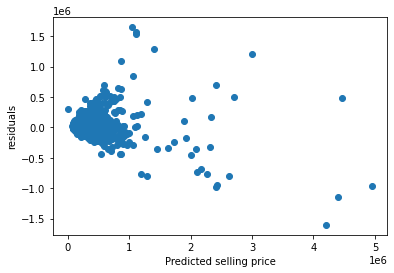

In [ ]:
# Check for Heteroscadacity
plt.scatter(10**(y_pred),10**(y_test)-10**(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Linear regression model from statsmodels.api.**

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     851.2
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:00:03   Log-Likelihood:                 1216.2
No. Observations:                3395   AIC:                            -2406.
Df Residuals:                    3382   BIC:                            -2327.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5522      0.003   1909.251      0.000       5.546       5.558
x1            -0.1897      0.004    -51.399      0.000      -0.197      -0.182
x2            -0.0155      0.004     -4.059      0.000      -0.023      -0.008
x3            -0.0135      0.003     -4.225      0.000      -0.020      -0.007
x4             0.0797      0.004     18.199      0.000       0.071       0.088
x5             0.0568      0.004     14.286      0.000       0.049       0.065
x6            -0.0094      0.003     -3.283      0.001      -0.015      -0.004
x7            -0.0090      0.003     -3.139      0.002      -0.015      -0.003
x8             0.0447      0.002     26.130      0.000       0.041       0.048
x9            -0.0413      0.002    -24.174      0.000      -0.045      -0.038
x10           -0.0008      0.003     -0.258      0.797      -0.006       0.005
x11            0.0073      0.002      4.609      0.000       0.004       0.010
x12           -0.0104      0.002     -6.804      0.000      -0.013      -0.007
x13            0.0135      0.003      4.739      0.000       0.008       0.019
x14            0.0211      0.002     12.337      0.000       0.018       0.024
x15           -0.0211      0.002    -12.337      0.000      -0.024      -0.018
==============================================================================
Omnibus:                       49.481   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.208
Skew:                          -0.162   Prob(JB):                     2.09e-16
Kurtosis:                       3.637   Cond. No.                     8.83e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Implementing Lasso Regression**

---


Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.7447902978883704

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
# lasso prediction results
print_metrics(10**y_test, 10**y_pred_l)

MSE is 59950820989.02636
RMSE is 244848.56746370063
R2 score is 0.76614814145239


In [ ]:
adjusted_r2(len(y_train), len(features), 10**y_test, 10**y_pred_l)

0.7648489644604588

Text(0, 0.5, 'Predicted selling price')

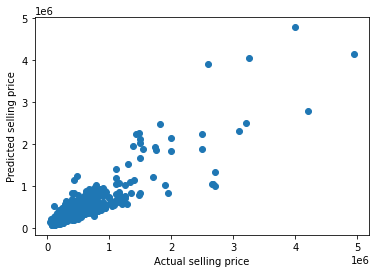

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_l))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

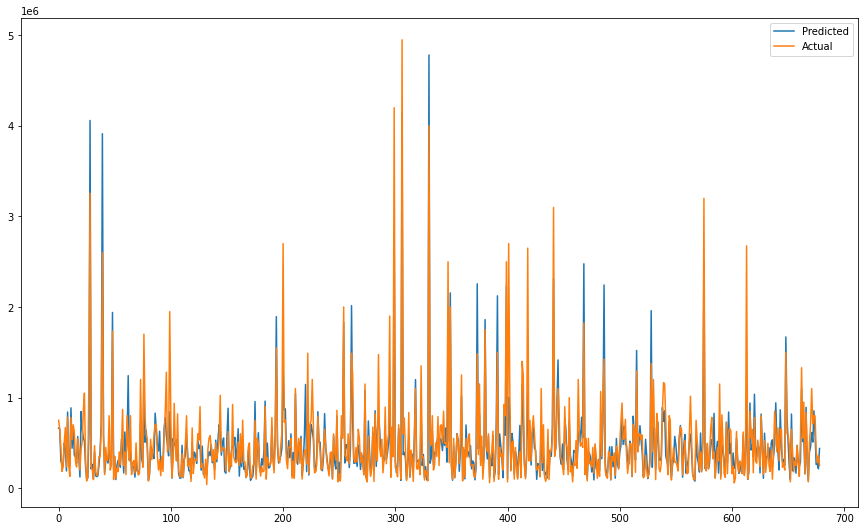

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

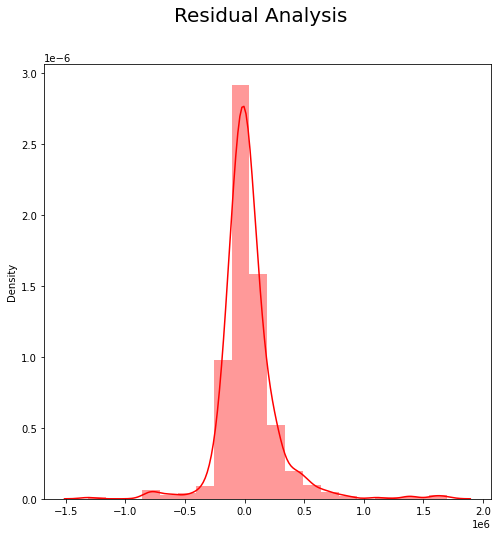

In [ ]:
#Residual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

Text(0, 0.5, 'residuals')

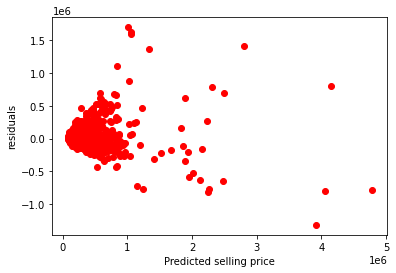

In [ ]:
# Check for Heteroscadacity
plt.scatter(10**(y_pred_l),10**(y_test)-10**(y_pred_l),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Implementing Cross-Validation Procedure for Lasso**

---



---



In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.02934637624354794


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# lasso prediction results
print_metrics(10**y_test, 10**y_pred_lasso)

MSE is 61365646145.95363
RMSE is 247720.9037323125
R2 score is 0.760629293052834


In [ ]:
adjusted_r2(len(y_train), len(features), 10**y_test, 10**y_pred_lasso)

0.7592994557920164

Text(0, 0.5, 'Predicted selling price')

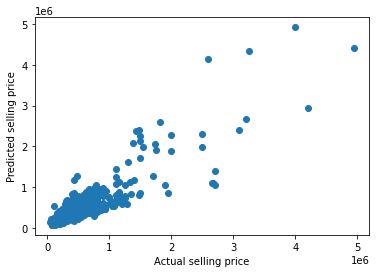

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

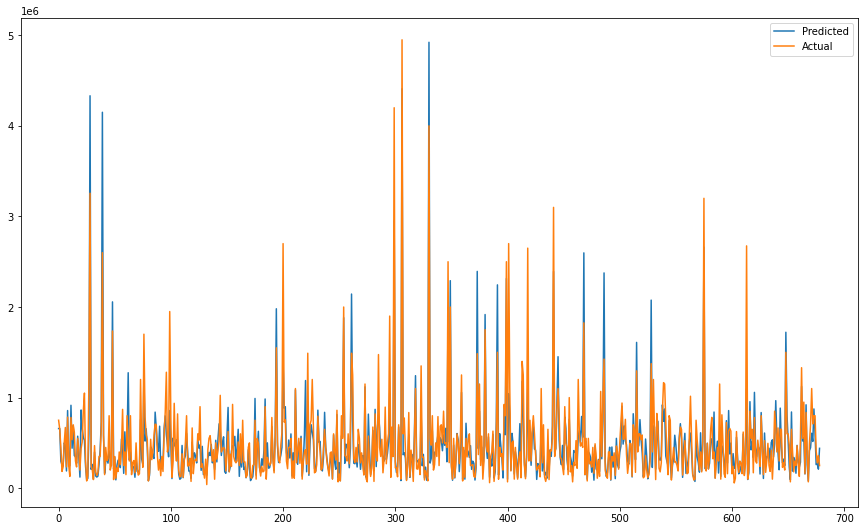

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

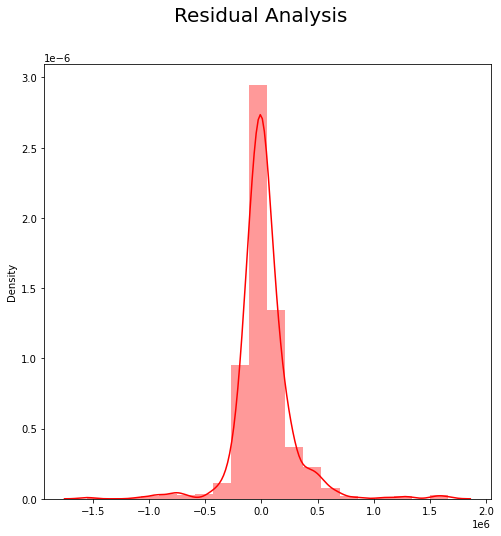

In [ ]:
#Residual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

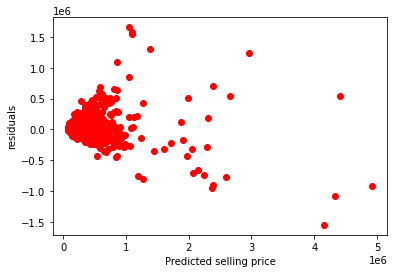

In [ ]:
# Check for Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Implementing Ridge Regression**

---



---


Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.7460217015531888

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
# ridge prediction results
print_metrics(10**y_test, 10**y_pred_r)

MSE is 61982766339.23514
RMSE is 248963.38353106292
R2 score is 0.758222074906938


Text(0, 0.5, 'Predicted selling price')

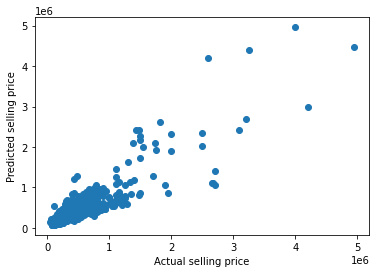

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_r))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

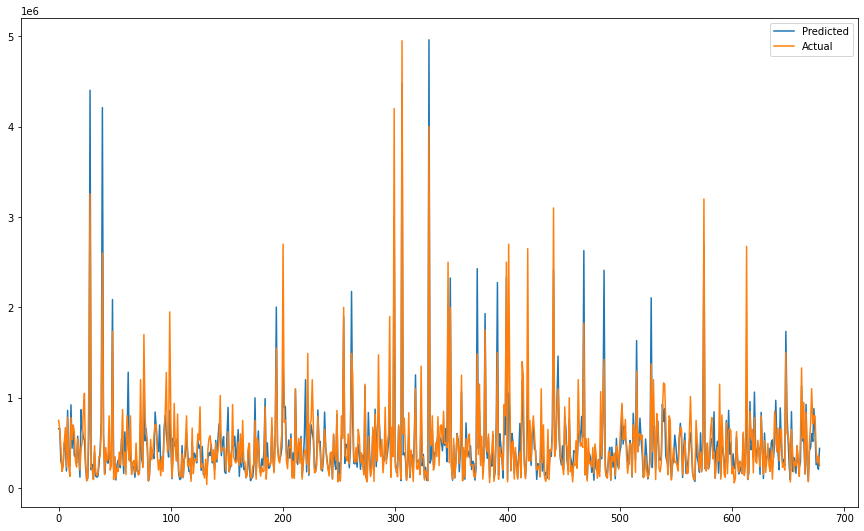

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(10**(y_pred_r))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

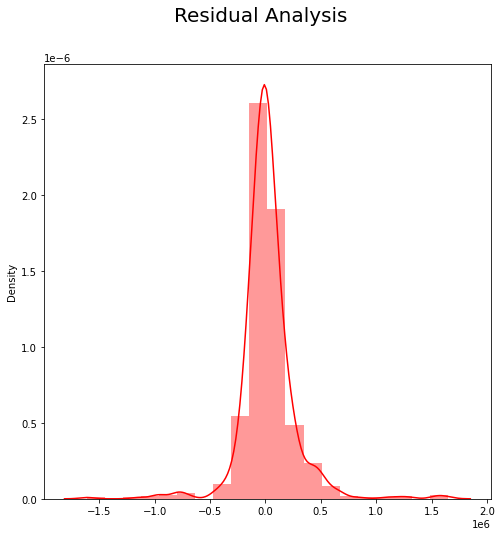

In [ ]:
#Residual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

Text(0, 0.5, 'residuals')

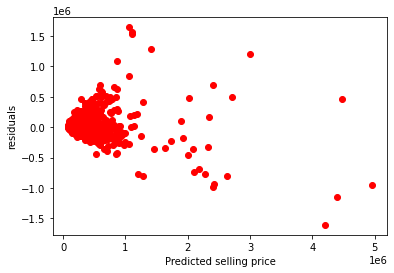

In [ ]:
# Check for Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Running Grid Search Cross Validation for Ridge Regression**

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.02940860813814189


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# ridge prediction results
print_metrics(10**y_test, 10**y_pred_ridge)

MSE is 61985423632.18352
RMSE is 248968.72018826686
R2 score is 0.7582117095293763


In [ ]:
adjusted_r2(len(y_train), len(features), 10**y_test, 10**y_pred_ridge)

0.756868441248984

Text(0, 0.5, 'Predicted selling price')

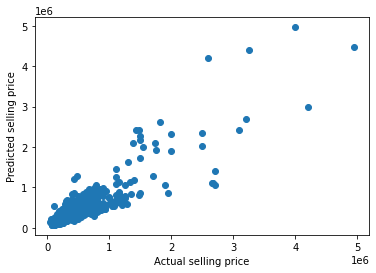

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

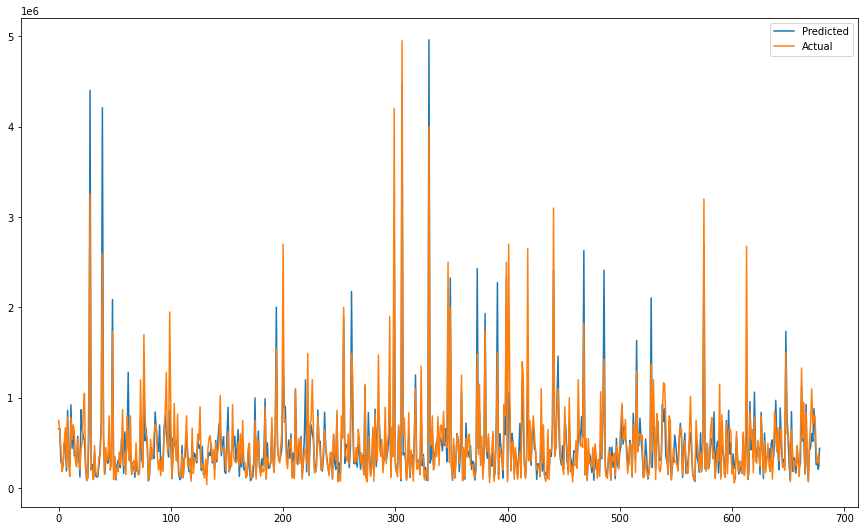

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

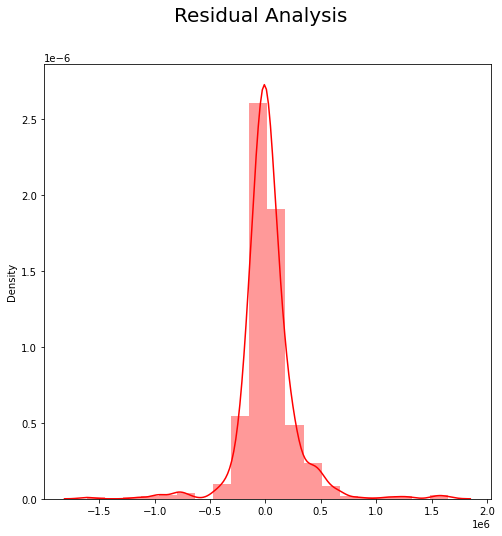

In [ ]:
#Residual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

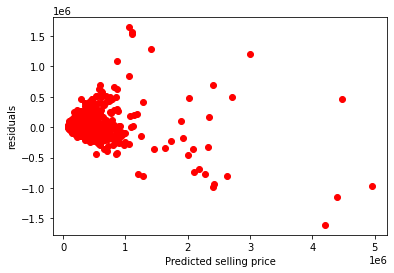

In [ ]:
# Check for Heteroscadacity
plt.scatter(10**(y_pred_ridge),10**(y_test)-10**(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

## **Conclusion**
From above model we can conclude the below points:

---



* Automatic vehicles fetch higher resale price compared to manual ones.
* Age of the vehicle seems to show negative correlation with selling price.
* Past_Owners and Kms_Driven are showing very less correlation with selling price.
* Resale value of cars with Fuel type CNG is higher as compared to others.
* Average price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.